In [1]:
import os, sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt


def unpacker(df, key, num_exp=3, num_rounds=300, idx=0):
    result = []

    for i in range(num_rounds):
        single_elem = []
        for j in range(num_exp):
            single_elem.append(list(df[key])[j * (num_rounds * num_exp) + i * 3 + idx])
        # print(single_elem)
        # single_elem = round(sum(single_elem)/num_exp, 3)
        result.append(single_elem)
    result = torch.Tensor(result)
    mean = result.mean(dim=1)
    under = mean - result.std(dim=1)
    upper = mean + result.std(dim=1)

    mean, under, upper = mean.tolist(), under.tolist(), upper.tolist()
    return mean, under, upper

In [2]:
p0 = './log/linear/[cifarcnn-cifar10]baseline_linear/results.csv'
p1 = './log/linear/[cifarcnn-cifar10]pruning_linear/results.csv'
p2 = './log/linear/[cifarcnn-cifar10]pruning_reverse_linear/results.csv'
df0, df1, df2 = pd.read_csv(p0), pd.read_csv(p1), pd.read_csv(p2)

In [3]:
cost0, cost1, cost2 = unpacker(df0, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost')
sparsity0, sparsity1, sparsity2 = unpacker(df0, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity')
acc0, acc1, acc2 = unpacker(df0, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', idx=2)
tr_loss0, tr_loss1, tr_loss2 = unpacker(df0, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', idx=0)
te_loss0, te_loss1, te_loss2 = unpacker(df0, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', idx=1)

In [4]:
rounds = [x + 1 for x in range(300)]

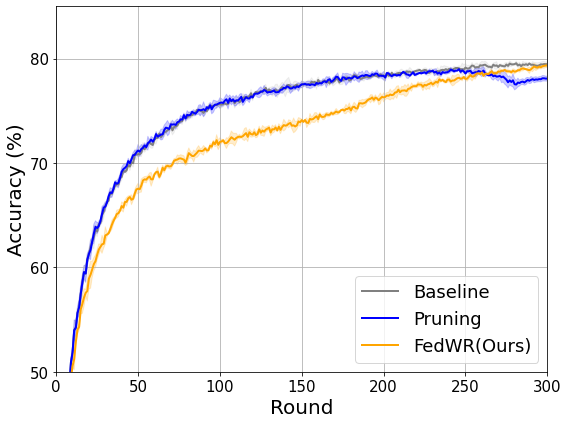

In [5]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([50 * x for x in range(7)], fontsize=15)

# Baseline
plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.1)

# Local Pruning
plt.plot(rounds, acc1[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='blue', alpha=0.2)

# Local Pruning Half
plt.plot(rounds, acc2[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='orange', alpha=0.2)


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 300)
plt.ylim(50, 85)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

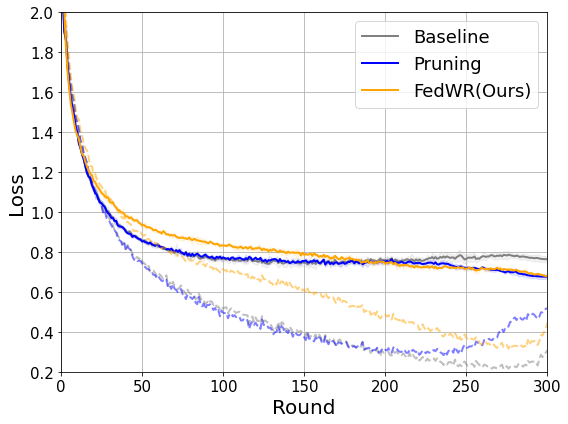

In [6]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.2 * y for y in range(11)], fontsize=15)

# baseline
plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

# Local Pruning
plt.plot(rounds, te_loss1[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# Local Pruning Half
plt.plot(rounds, te_loss2[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='orange', alpha=0.5, linestyle='--')

# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 300)
plt.ylim(0.2, 2)
plt.legend(fontsize=18, loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

In [7]:
p0 = './log/005/[cifarcnn-cifar10]baseline_constant_005/results.csv'
p1 = './log/005/[cifarcnn-cifar10]pruning_constant_005/results.csv'
p2 = './log/005/[cifarcnn-cifar10]pruning_reverse_constant_005/results.csv'
df0, df1, df2 = pd.read_csv(p0), pd.read_csv(p1), pd.read_csv(p2)

In [8]:
cost0, cost1, cost2 = unpacker(df0, 'Cost'), unpacker(df1, 'Cost'), unpacker(df2, 'Cost')
sparsity0, sparsity1, sparsity2 = unpacker(df0, 'sparsity'), unpacker(df1, 'sparsity'), unpacker(df2, 'sparsity')
acc0, acc1, acc2 = unpacker(df0, 'ACC', idx=2), unpacker(df1, 'ACC', idx=2), unpacker(df2, 'ACC', idx=2)
tr_loss0, tr_loss1, tr_loss2 = unpacker(df0, 'Loss', idx=0), unpacker(df1, 'Loss', idx=0), unpacker(df2, 'Loss', idx=0)
te_loss0, te_loss1, te_loss2 = unpacker(df0, 'Loss', idx=1), unpacker(df1, 'Loss', idx=1), unpacker(df2, 'Loss', idx=1)

In [9]:
rounds = [x + 1 for x in range(300)]

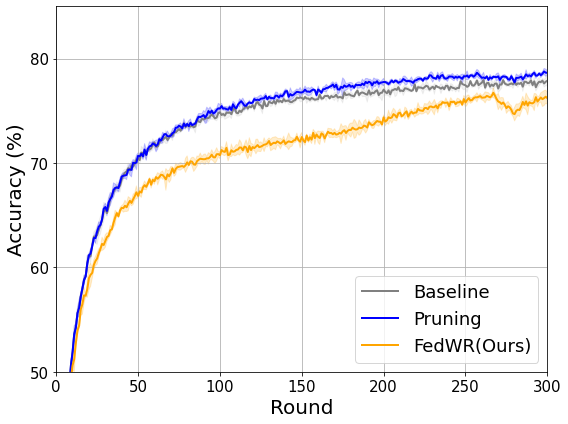

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.yticks([10 * x for x in range(10)], fontsize=15)
plt.xticks([50 * x for x in range(7)], fontsize=15)

# Baseline
plt.plot(rounds, acc0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, acc0[1], acc0[2], color='gray', alpha=0.1)

# Local Pruning
plt.plot(rounds, acc1[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, acc1[1], acc1[2], color='blue', alpha=0.2)

# Local Pruning Half
plt.plot(rounds, acc2[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, acc2[1], acc2[2], color='orange', alpha=0.2)


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xlim(0, 300)
plt.ylim(50, 85)
plt.legend(fontsize=18, loc='lower right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

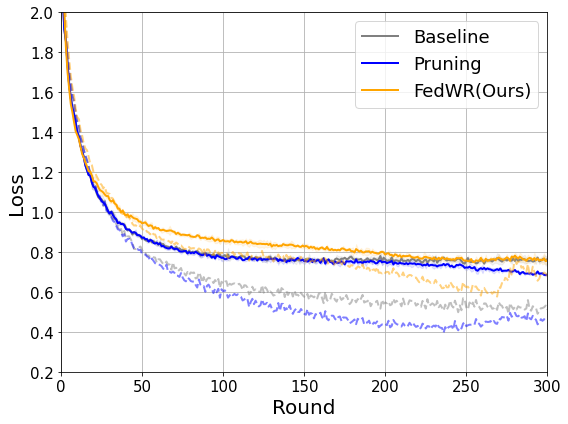

In [11]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.2 * y for y in range(11)], fontsize=15)

# baseline
plt.plot(rounds, te_loss0[0], label='Baseline', lw=2, color='gray', alpha=1)
plt.fill_between(rounds, te_loss0[1], te_loss0[2], color='gray', alpha=0.1)
plt.plot(rounds, tr_loss0[0], lw=2, color='gray', alpha=0.5, linestyle='--')

# Local Pruning
plt.plot(rounds, te_loss1[0], label='Pruning', lw=2, color='blue', alpha=1)
plt.fill_between(rounds, te_loss1[1], te_loss1[2], color='blue', alpha=0.1)
plt.plot(rounds, tr_loss1[0], lw=2, color='blue', alpha=0.5, linestyle='--')

# Local Pruning Half
plt.plot(rounds, te_loss2[0], label='FedWR(Ours)', lw=2, color='orange', alpha=1)
plt.fill_between(rounds, te_loss2[1], te_loss2[2], color='orange', alpha=0.1)
plt.plot(rounds, tr_loss2[0], lw=2, color='orange', alpha=0.5, linestyle='--')

# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim(0, 300)
plt.ylim(0.2, 2)
plt.legend(fontsize=18, loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()

In [12]:
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

class ConstantLR:
    def __init__(self, init_lr):
        self.init_lr = init_lr
        self.crnt_lr = self.init_lr

    def get_lr(self):
        return [self.crnt_lr]

    def step(self):
        pass


class LinearLR:
    def __init__(self, init_lr, epoch, eta_min):
        self.init_lr = init_lr
        self.crnt_lr = init_lr

        tot_diff = init_lr - eta_min
        self.diff = tot_diff / (epoch-1)

    def get_lr(self):
        return [self.crnt_lr]

    def step(self):
        self.crnt_lr -= self.diff

        
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer = torch.nn.Linear(10, 20)
        self.t = 1
    
    def forward(self,x=1):
        return self.t

In [13]:
cosine, linear, constant = [], [], []

tmp_model = Model()
tmp_loss = torch.tensor(0., requires_grad=True)
tmp_opt = torch.optim.SGD(tmp_model.parameters(), lr=0.05)

In [14]:
s1 = CosineAnnealingLR(tmp_opt, 300, eta_min=5e-6, last_epoch=-1)
s2 = server_lr_scheduler = LinearLR(0.05, 300, eta_min=5e-6)
s3 = ConstantLR(0.05)

for i in range(300):
    cosine.append(s1.get_lr())
    linear.append(s2.get_lr())
    constant.append(s3.get_lr())
    
    s1.step()
    s2.step()
    s3.step()

/home/aailab/anaconda3/envs/fl/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:484: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
/home/aailab/anaconda3/envs/fl/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


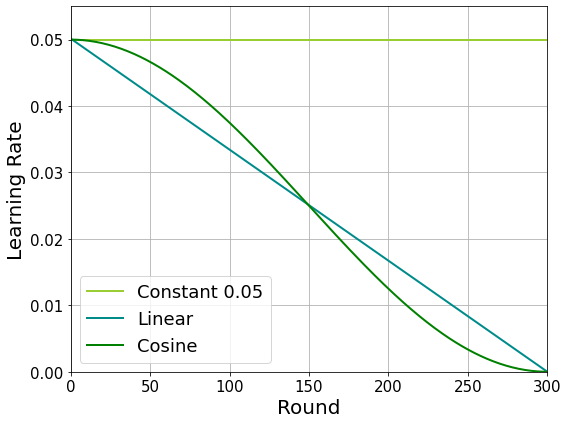

In [16]:
fig = plt.figure(figsize=(8, 6))
plt.xticks([50 * x for x in range(7)], fontsize=15)
plt.yticks([0.01 * y for y in range(11)], fontsize=15)

plt.plot(rounds, constant, label='Constant 0.05', lw=2, color='yellowgreen', alpha=1)

plt.plot(rounds, linear, label='Linear', lw=2, color='darkcyan', alpha=1)

plt.plot(rounds, cosine, label='Cosine', lw=2, color='green', alpha=1)


# plt.plot(, label='Pruning', lw=5, color='blue')
plt.xlabel('Round', fontsize=20)
plt.ylabel('Learning Rate', fontsize=20)
plt.xlim(0, 300)
plt.ylim(0, 0.055)
plt.legend(fontsize=18, loc='best')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()